<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_3_Frecuencias_datos_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 3. Análisis descriptivo de datos de aplicaciones de vacunas y fabricantes COVID

# Objetivo

Realizar un análisis descriptivo de frecuencias sobre los datos de aplicaciones de vacunas en distintos países  y fabricantes de las mismas de COVID.

# Descripción

Cargar los datos de COVID de la URL: (https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/country%20vaccinations%20by%20manufacturer.csv). Fuente: [kaggle.com](https://kaggle.com)

Resolver las siguientes necesidades de datos:

1. ¿Cuál país ha tenido mas aplicaciones a lo largo del tiempo?, contar  count() los registros, ¿Será USA?

2. ¿Cuál fabricante de vacunas ha tenido mas aplicaciones a lo largo del tiempo?, contar count() los registros ¿será Pfizer/BioNTech?

3. ¿Cuántas vacunas se han aplicado por país?, sumar (total_vaccinations) la cantidad de aplicaciones por país?

4. ¿Cuántas vacunas se han aplicado por fabricante?, sumar (total_vaccinations) las vacunas agrupadas por fabricante

5. ¿En que mes se ha aplicado mas vacunas?, sumar (total_vaccinations) agrupada por mes

Visualizar diagramas de barra por cada tipo de consulta, de las cuatro preguntas visualziar diagramas de barras en donde el eje de las x es pais o fabricacnte y el eje de las y es la frecuencia

# Desarrollo


## Cargar datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/country%20vaccinations%20by%20manufacturer.csv"
covid = pd.read_csv(url)

covid

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31020
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
10960,Uruguay,2021-08-07,Pfizer/BioNTech,1562360
10961,Uruguay,2021-08-07,Sinovac,3234519
10962,Uruguay,2021-08-08,Oxford/AstraZeneca,84121
10963,Uruguay,2021-08-08,Pfizer/BioNTech,1562430


### Variables
* location. Significa el pais en donde se aplica la vacuna
* date. La fecha en que se aplica en formato "YYYY-MM-DD"
* vaccine. Singiica el fabricant de la vacuna
total_vaccinations La cantidad de cacunas que se aplicaron en esa fecha en ese paíes de ese fabricante



## Frecuencia de aplicaciones por país

1. ¿Cuál país ha tenido mas aplicaciones a lo largo del 
tiempo?, contar  count() los registros, ¿Será USA?

Urilizar la función groupby utilizando el tipo de variable de interés location.


In [11]:
from numpy.ma.core import sort
frec_pais= covid.groupby(['location']).count() 
print(frec_pais)



               date  vaccine  total_vaccinations
location                                        
Austria         124      124                 124
Belgium         104      104                 104
Bulgaria        107      107                 107
Chile           565      565                 565
Croatia         116      116                 116
Cyprus          100      100                 100
Czechia         744      744                 744
Denmark          95       95                  95
Estonia         105      105                 105
Finland         127      127                 127
France          712      712                 712
Germany         900      900                 900
Hong Kong       336      336                 336
Hungary         158      158                 158
Iceland         884      884                 884
Ireland         113      113                 113
Italy           746      746                 746
Japan           225      225                 225
Latvia          749 

### Ordenando datos

In [10]:
frc_pais_orden = frec_pais.sort_values('total_vaccinations', ascending = False)
print(frc_pais_orden)

               date  vaccine  total_vaccinations
location                                        
Germany         900      900                 900
Iceland         884      884                 884
Latvia          749      749                 749
Italy           746      746                 746
Czechia         744      744                 744
Lithuania       731      731                 731
France          712      712                 712
Romania         669      669                 669
Chile           565      565                 565
United States   556      556                 556
Uruguay         489      489                 489
Switzerland     454      454                 454
Hong Kong       336      336                 336
Japan           225      225                 225
Hungary         158      158                 158
Netherlands     128      128                 128
Poland          128      128                 128
Finland         127      127                 127
Austria         124 

Alemania ha aplicado en mas ocasiones en fechas diferentes vacunas con con un total de 900 aplicaciones eguinda de islandia con 884; por el contrario países que menos aplicaciones tiene son Sweden con 89 y Liechtenstein con 52 aplicaoines en fechas distintas.

## Visualizando frecuencias

Se visualiza el top cinco de los registros de los países con mas aplicaciones de vacunas en fechas diferentes




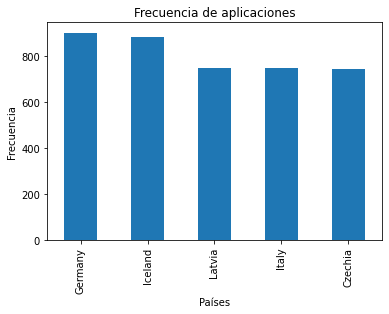

In [50]:

frc_pais_orden.head()['date'].plot(kind='bar',title='Frecuencia de aplicaciones', 
                                   xlabel="Países", ylabel="Frecuencia" ) 





Países con menos aplicaciones en fechas diferentes

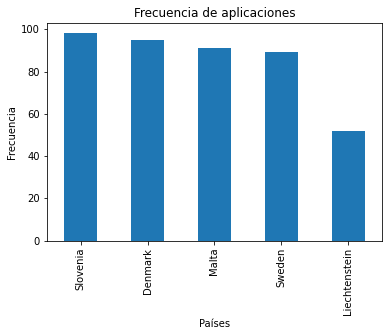

In [51]:
frc_pais_orden.tail()['date'].plot(kind='bar',title='Frecuencia de aplicaciones', 
                                   xlabel="Países", ylabel="Frecuencia" )